#  Poject working

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db= mysql.connector.connect(host="localhost",
                            username="root",
                            password="123456",
                            database= "ecommerce")
cur=db.cursor()
                            

# 1. List all unique cities where customers are located.

In [2]:
query= """select distinct customer_city from customers"""

cur.execute(query)
data=cur.fetchall()
# data
df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# 2. Count the number of orders placed in 2017.

In [3]:
query2="""select count(order_id) from orders where year(order_purchase_timestamp)=2018"""
cur.execute(query2)
data=cur.fetchall()
data

[(108022,)]

# 3. Find the total sales per category.

In [4]:
query3="""select products.product_category, 
round(sum(payments.payment_value),2) sales 
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id= order_items.order_id
group by product_category"""

cur.execute(query3)
data=cur.fetchall()
# data
df=pd.DataFrame(data, columns=["product_category", "sales"])
df.head()

,product_category,sales
0,perfumery,1013477.32
1,Furniture Decoration,2860352.78
2,telephony,973764.10
3,Fashion Bags and Accessories,436316.56
4,bed table bath,3425107.34


 # 4. Calculate the percentage of orders that were paid in installments.

In [5]:
query4="""select sum(case when payment_installments >= 1 then 1 else 0 end)/count(*)*100 from payments;"""

cur.execute(query4)
data=cur.fetchall()
data

[(Decimal('99.9981'),)]

# 5. Count the number of customers from each state. 

In [6]:
query5="""select customer_state, count(customer_id)  from customers group by customer_state"""

cur.execute(query5)
data = cur.fetchall()
# data
df=pd.DataFrame(data, columns=["States", "Customers_Count"])
df.head()

,States,Customers_Count
0,SP,83492
1,SC,7274
2,MG,23270
3,PR,10090
4,RJ,25704


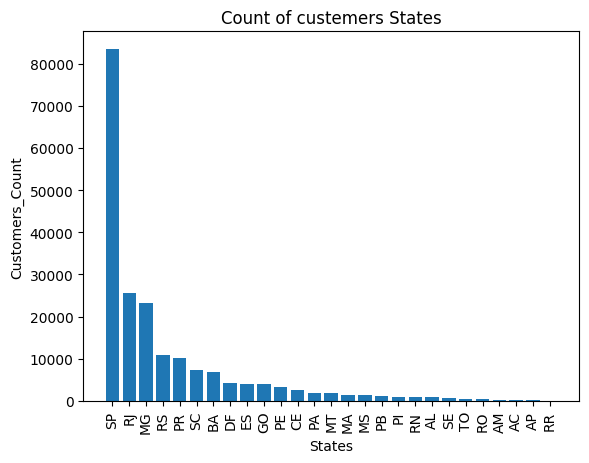

In [7]:
# Graph
df= df.sort_values(by="Customers_Count", ascending=False)
plt.bar(df["States"],df["Customers_Count"])
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Customers_Count")
plt.title("Count of custemers States")
plt.show()


# Intermediate Queries

# 1. Calculate the number of orders per month in 2018.

In [8]:
Query1="""select monthname(order_purchase_timestamp)Months,count(order_id) as Order_Count from orders where year(order_purchase_timestamp)=2018 group by Months;"""

cur.execute(Query1)
data = cur.fetchall()
# data
df=pd.DataFrame(data, columns=["Months", "Order_Count"])
df

,Months,Order_Count
0,July,12584
1,August,13024
2,February,13456
3,June,12334
4,March,14422
5,January,14538
6,May,13746
7,April,13878
8,September,32
9,October,8


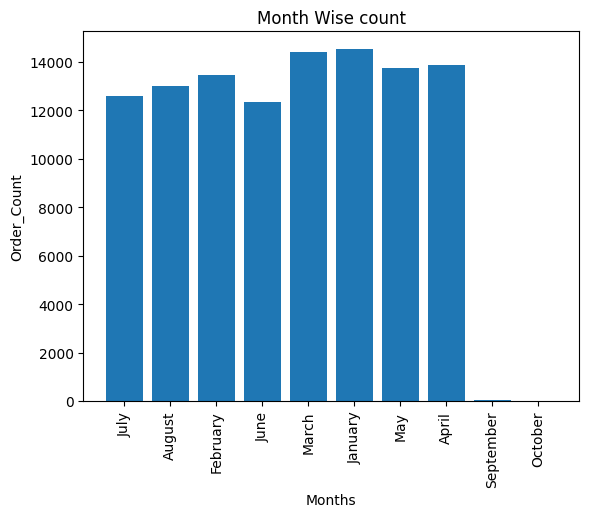

In [9]:
# plot the graph
Mon=["Jan","Feb", "Mar", "Apr", "May", "Jun","Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.bar(df["Months"],df["Order_Count"])
plt.xticks(rotation=90)
plt.xlabel("Months")
plt.ylabel("Order_Count")
plt.title("Month Wise count")

plt.show()


In [10]:
# ax=sns.barplot(x="Months",y="Order_Count",order=Mon,data=df, hue=df["Months"], paletter="viridis")
# plt.xticks(rotation=90)
# ax.bar_lable(ax.containers[0])
# plt.xlabel("Months")
# plt.ylabel("Order_Count")
# plt.title("Count of orders by Months is 2018")
# plt.show()

# 2. Find the average number of products per order, grouped by customer city.

In [11]:
Query1="""
with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id)as oc
from orders join order_items
on orders.order_id= order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city,round(avg(count_per_order.oc),2)
from customers join count_per_order
on customers.customer_id= count_per_order.customer_id
group by customers.customer_city"""

cur.execute(Query1)
data = cur.fetchall()
# data
df=pd.DataFrame(data, columns=["City","Avg_Count_Orders"])

df

,City,Avg_Count_Orders
0,treze tilias,2.55
1,indaial,2.23
2,sao jose dos campos,2.28
3,sao paulo,2.31
4,porto alegre,2.35
...,...,...
4105,buriti,6.00
4106,tibau do sul,2.00
4107,morro agudo de goias,2.00
4108,sao mamede,2.00


# 3. Calculate the percentage of total revenue contributed by each product category.

In [12]:
Query2="""select upper(products.product_category)as category, 
round((sum(payments.payment_value)/(select sum(payment_value)from payments))*100,2) sales 
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id= order_items.order_id
group by product_category order by sales desc"""

cur.execute(Query1)
data = cur.fetchall()
# data
df=pd.DataFrame(data, columns=["category","sales%"])
df

,category,sales%
0,treze tilias,2.55
1,indaial,2.23
2,sao jose dos campos,2.28
3,sao paulo,2.31
4,porto alegre,2.35
...,...,...
4105,buriti,6.00
4106,tibau do sul,2.00
4107,morro agudo de goias,2.00
4108,sao mamede,2.00


# 4. Identify the correlation between product price and the number of times a product has been purchased.

In [13]:
Query4="""select products.product_category,count(order_items.product_id),
round(avg(order_items.price ),2)
from products join order_items
on products.product_id= order_items.product_id
group by products.product_category"""

cur.execute(Query4)
data = cur.fetchall()
# data

df=pd.DataFrame(data,columns=["product_category","Order_Count","price"])
df


,product_category,Order_Count,price
0,HEALTH BEAUTY,19340,130.16
1,sport leisure,17282,114.34
2,Cool Stuff,7592,167.36
3,computer accessories,15654,116.51
4,Watches present,11982,201.14
...,...,...,...
69,flowers,66,33.64
70,Kitchen portable and food coach,30,264.57
71,CITTE AND UPHACK FURNITURE,76,114.95
72,House Comfort 2,60,25.34


In [14]:
arr1= df["Order_Count"]
arr2= df["price"]
a=np.corrcoef([arr1,arr2])
print("This is correlation between price and number of times a product has been purchased is",a[0][1])

This is correlation between price and number of times a product has been purchased is -0.10631514167157562


# 5. Calculate the total revenue generated by each seller, and rank them by revenue.

In [3]:
# utilize window function
Query5="""select * ,dense_rank() over(order by revenue desc) as Rank1 from
(select order_items.seller_id, sum(payments.payment_value)as Revenue
from order_items join payments
on order_items.order_id =payments.order_id
group by order_items.seller_id) as a"""

cur.execute(Query5)
data = cur.fetchall()
# data

df=pd.DataFrame(data,columns=["seller_id","Revenue","Rank"])
df.head(5)

,seller_id,Revenue,Rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.907302,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.039840,2
2,4a3ca9315b744ce9f8e9374361493884,301245.269765,3
3,1f50f920176fa81dab994f9023523100,290253.420128,4
4,53243585a1d6dc2643021fd1853d8905,284903.080498,5


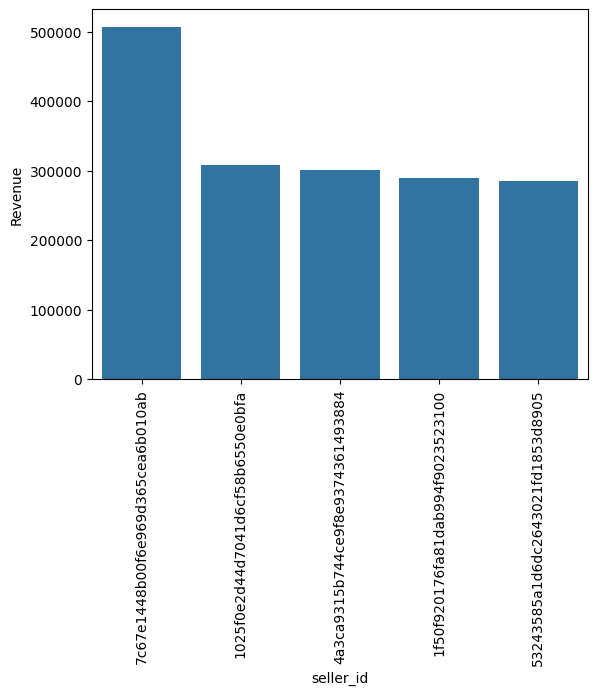

In [5]:
df=df.head()
sns.barplot(x="seller_id",y="Revenue",data=df)
plt.xticks(rotation=90)
plt.show()

# Advanced Queries

# 1. Calculate the moving average of order values for each customer over their order history.

In [13]:
Query_1="""select customer_id,order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row)as Mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders on payments.order_id = orders.order_id)as a"""

cur.execute(Query_1)
data = cur.fetchall()
# data

df=pd.DataFrame(data,columns=["customer_id","order_purchase_timestamp","payment","Mov_avg"])
df.head(5)

,customer_id,order_purchase_timestamp,payment,Mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
3,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
4,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998


# 2. Calculate the cumulative sales per month for each year.

In [16]:
Query_2="""select years , months, payment ,sum(payment)
 over(order by years, months) cumulative_sales from
(select year(orders.order_purchase_timestamp)as years,
month(orders.order_purchase_timestamp)as months,
round(sum(payments.payment_value),2)as payment from orders join payments
on orders.order_id= payments.order_id 
group by years, months order by years asc ,months asc)as a;"""

cur.execute(Query_2)
data = cur.fetchall()
# data

df=pd.DataFrame(data,columns=["Years","Months","payment","cumulative_sales"])
df.head(5)

,Years,Months,payment,cumulative_sales
0,2016,9,504.48,504.48
1,2016,10,118180.96,118685.44
2,2016,12,39.24,118724.68
3,2017,1,276976.08,395700.76
4,2017,2,583816.02,979516.78


# 3. Calculate the year-over-year growth rate of total sales.

In [21]:
Query_3=""" with a as (select year(orders.order_purchase_timestamp)as years,
round(sum(payments.payment_value),2)as payment from orders join payments
on orders.order_id= payments.order_id 
group by years order by years asc)
select years, ((Payment-lag(payment,1) over(order by years))/
lag(payment,1) over(order by years))*100
Year_over_year_growth from a;"""

cur.execute(Query_3)
data = cur.fetchall()
# data
df=pd.DataFrame(data,columns=["Years","Year_over_year_growth"])
df.head(5)

,Years,Year_over_year_growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# 4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [23]:
Query_4= """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp)first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as(select a.customer_id, count(distinct orders.order_purchase_timestamp)
from a join orders
on orders.customer_id= a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp <
date_add(first_order,interval 6 month)
group by a .customer_id)

select 100 * (count(distinct a.customer_id)/ count(distinct b.customer_id))
from a left join b
on a.customer_id= b.customer_id;"""

cur.execute(Query_4)
data = cur.fetchall()
data


[(None,)]

# 5. Identify the top 3 customers who spent the most money in each year.

In [27]:
Query_5="""select Purchase_year,customer_id, payment,d_rank
from
(select year(orders.order_purchase_timestamp) as Purchase_year,orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over (partition by year(orders.order_purchase_timestamp) 
order by  sum(payments.payment_value)desc) d_rank
from orders join  payments
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id order by Purchase_year asc ) as a
where d_rank <=3;"""

cur.execute(Query_5)
data = cur.fetchall()
data

df=pd.DataFrame(data,columns=["Years","customer_id","Payment" , "Rank"])
df


,Years,customer_id,Payment,Rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,2847.100098,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,2801.479980,2
2,2016,4a06381959b6670756de02e07b83815f,2455.560059,3
3,2017,1617b1357756262bfa56ab541c47bc16,27328.160156,1
4,2017,c6e2731c5b391845f6800c97401a43a9,13858.620117,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,13453.320312,3
6,2018,ec5b2ba62e574342386871631fafd3fc,14549.759766,1
7,2018,f48d464a0baaea338cb25f816991ab1f,13844.419922,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,9618.879883,3


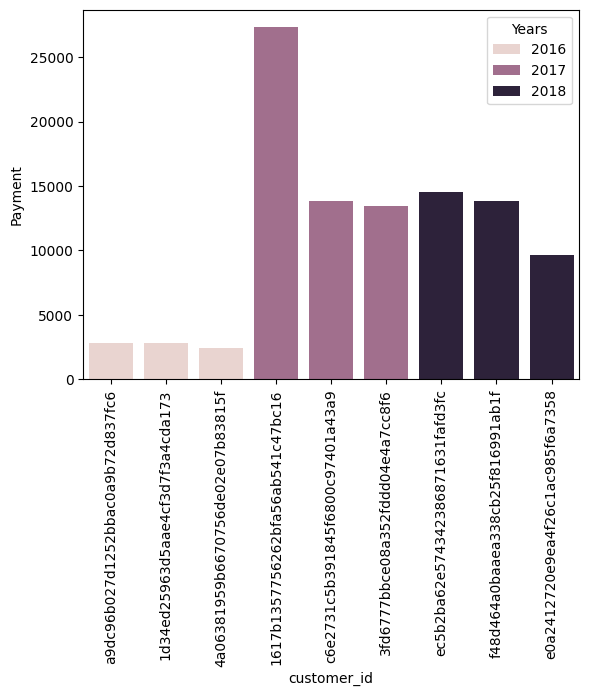

In [31]:
sns.barplot(x="customer_id", y="Payment", data=df,hue="Years")
plt.xticks(rotation=90)
plt.show()